<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [58]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [16]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [17]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [18]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [19]:
tesla_data = tesla.history(period="max")


In [20]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named `html_data`.


In [21]:

url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text


Parse the html data using `beautiful_soup`.


In [22]:
#soup = BeautifulSoup(html_data,"html5lib")
soup = BeautifulSoup(html_data)

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [23]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')

        for row in rows:
            col = row.find_all('td')

            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [42]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function


In [55]:
tesla_revenue.tail()


,Date,Revenue


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [28]:
gme = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [29]:
gme_data = gme.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [30]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [33]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [34]:
#soup = BeautifulSoup(html_data,"html5lib")
soup = BeautifulSoup(html_data)

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


In [35]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')

        for row in rows:
            col = row.find_all('td')

            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [1]:
gme_revenue.tail(5)

NameError: name 'gme_revenue' is not defined

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [37]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    # Create a plot for stock data (assuming it's indexed by Date)
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot stock price on the left Y-axis
    ax1.plot(stock_data['Date'], stock_data['Close'], color='b', label="Stock Price")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Plot revenue on the right Y-axis
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='g', label="Revenue")
    ax2.set_ylabel('Revenue', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    # Set title and show the plot
    plt.title(f'{company_name} Stock Price and Revenue Over Time')
    fig.tight_layout()
    plt.show()



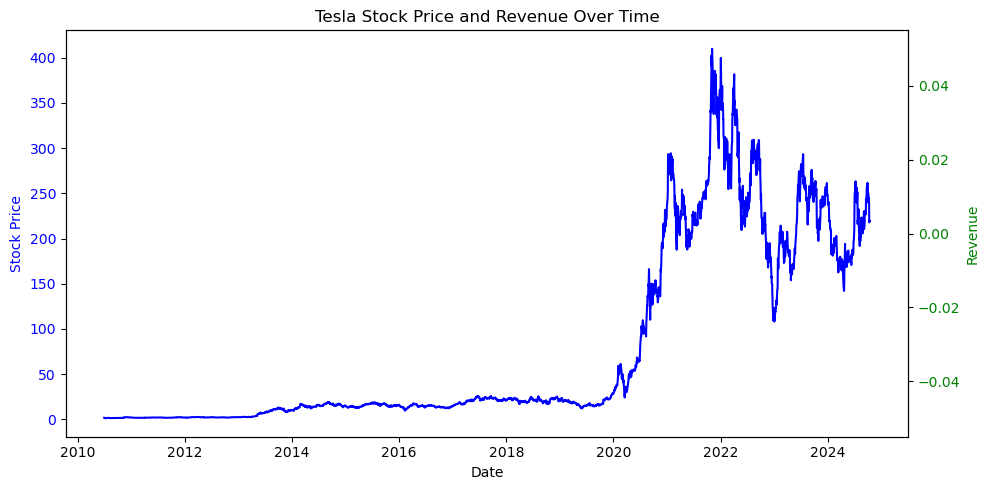

In [38]:
make_graph(tesla_data[['Date','Close']], tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

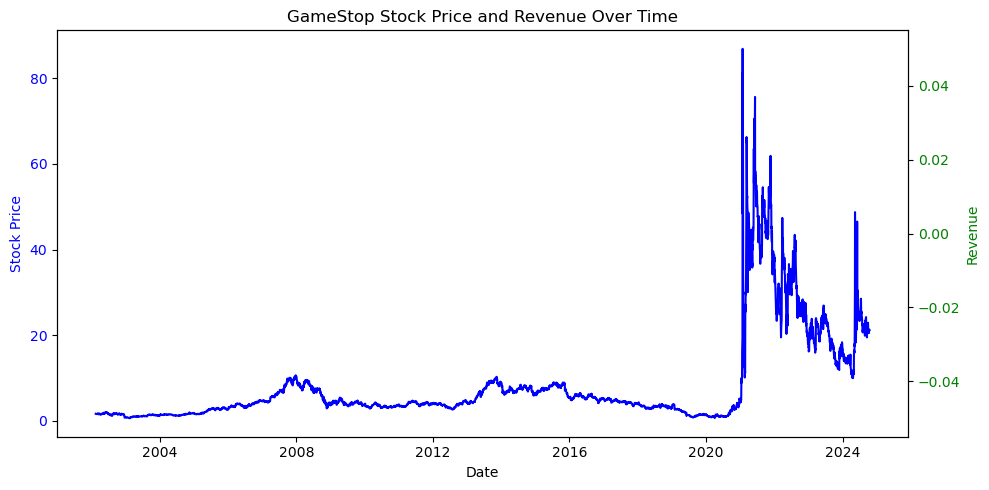

In [40]:
# Call the make_graph function to plot GameStop stock data
make_graph(gme_data, gme_revenue, 'GameStop')
